In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix , roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

import warnings
warnings.simplefilter(action="ignore")

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel("ECommerce_Dataset.xlsx", sheet_name='E Comm')

# Data Cleaning

In [3]:
print("**Dataset:**")
print("-------------data-------------------")
display(df.head())
print("--------------Data shape ------------------")
print("**Dataset shape:**", df.shape)

**Dataset:**
-------------data-------------------


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


--------------Data shape ------------------
**Dataset shape:** (5630, 20)


In [4]:
df.isnull().values.any()

True

In [5]:
print("**Data Information:**") 
df.info()

**Data Information:**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 

In [6]:
print("**Misssing Value Count**")
df[df.columns].isna().sum()

**Misssing Value Count**


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.fillna(df.median(numeric_only=True).round(1), inplace=True)

In [8]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [10]:
print("**Misssing Value Count**")
df[df.columns].isna().sum()

**Misssing Value Count**


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [11]:

# convert the datatype of 'Complain' to object 
df['Complain'] = df['Complain'].astype('int')

# drop the customerID
df = df.drop('CustomerID', axis = 1)


# leave the datatype of churn (predictor) as an integer for short, to check its relation with numerical variables.

## Check Outliers

Text(0, 0.5, 'Values')

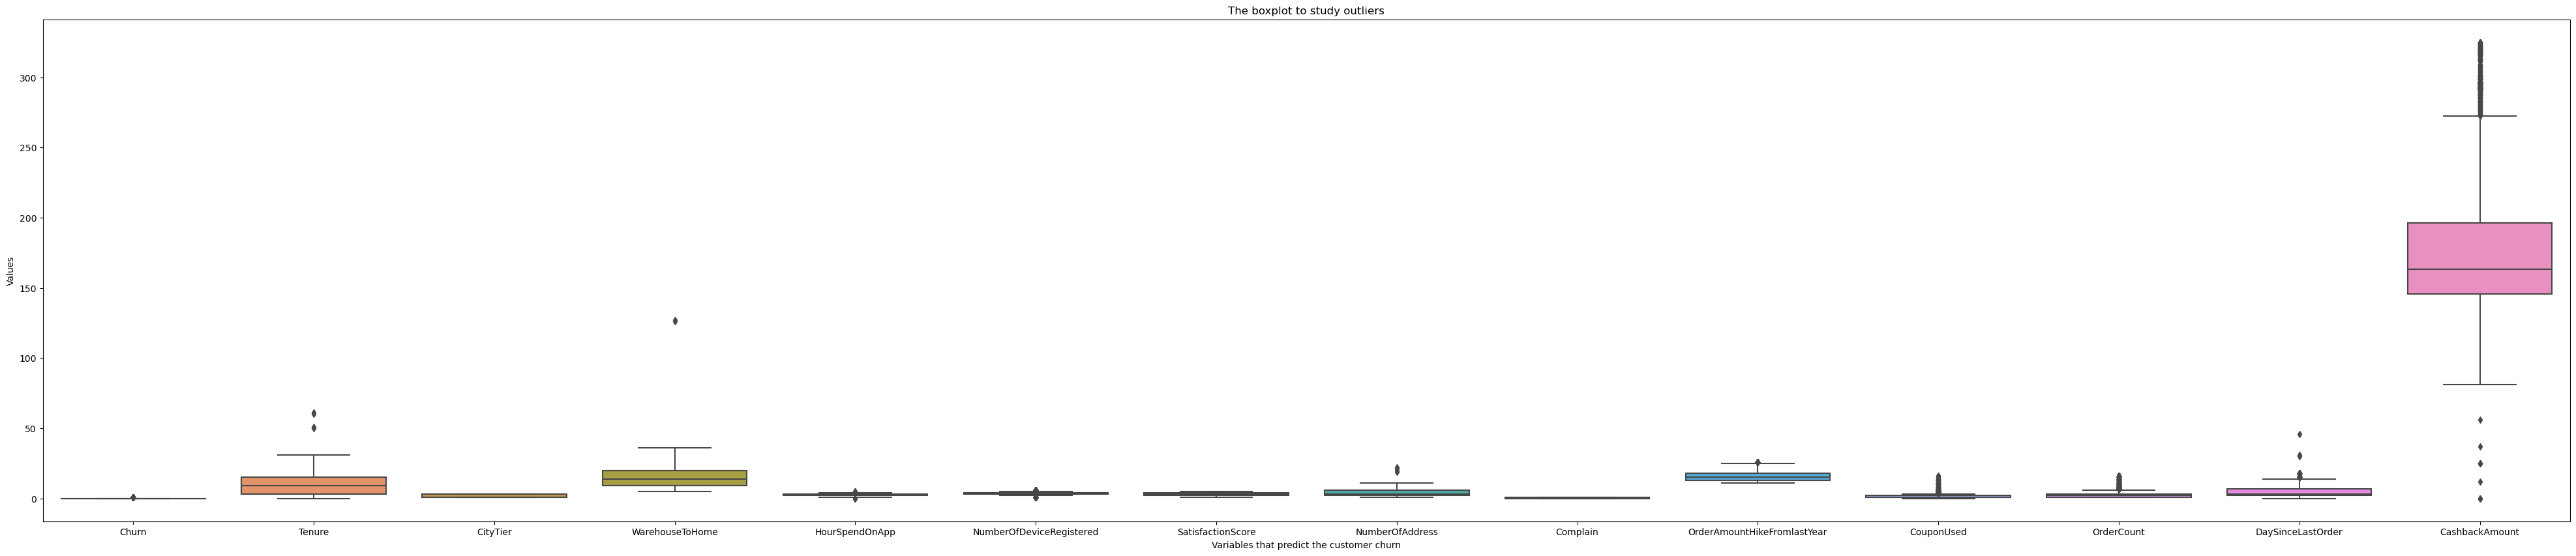

In [12]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

## <font color="blue">The Tenure, Days since last order, cashback amount, and warehouse to home features have outliers, but the outliers don't have huge impact on tree models, which will be my final model so I will keep them.</font>

# Exploratory Data Analysis

## churn rate of our data : The average customer churn rate is :  16.84%

<function matplotlib.pyplot.show(close=None, block=None)>

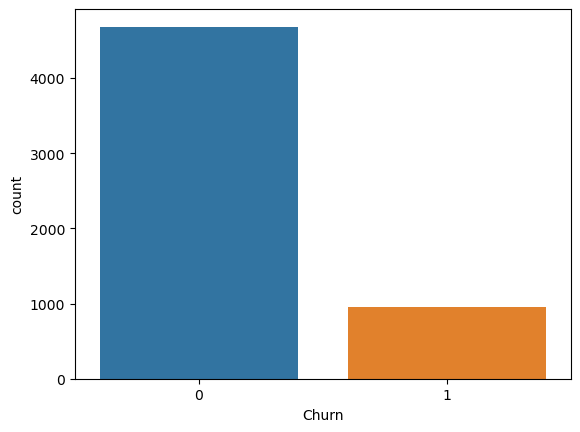

In [13]:
sns.countplot(data=df, x="Churn")

plt.show

In [14]:
avg_churn = df['Churn'][df['Churn'] == 1].count() / df['Churn'].count() * 100
print('The average customer churn rate is : ', round(avg_churn, 2))

The average customer churn rate is :  16.84


### Seperate the variables to numeric values and categorical values for better analysis

In [15]:
# make lists for categorical variables and numerical ones each
cate=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cate.append(i)
  else:
    num.append(i)
print('cate = ',cate[1:]) # excluding Churn
print('num = ',num[1:])

cate =  ['PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


# Correlation map of Numerical values with churn

Text(0.5, 1.0, 'Numeric variables versus Churn')

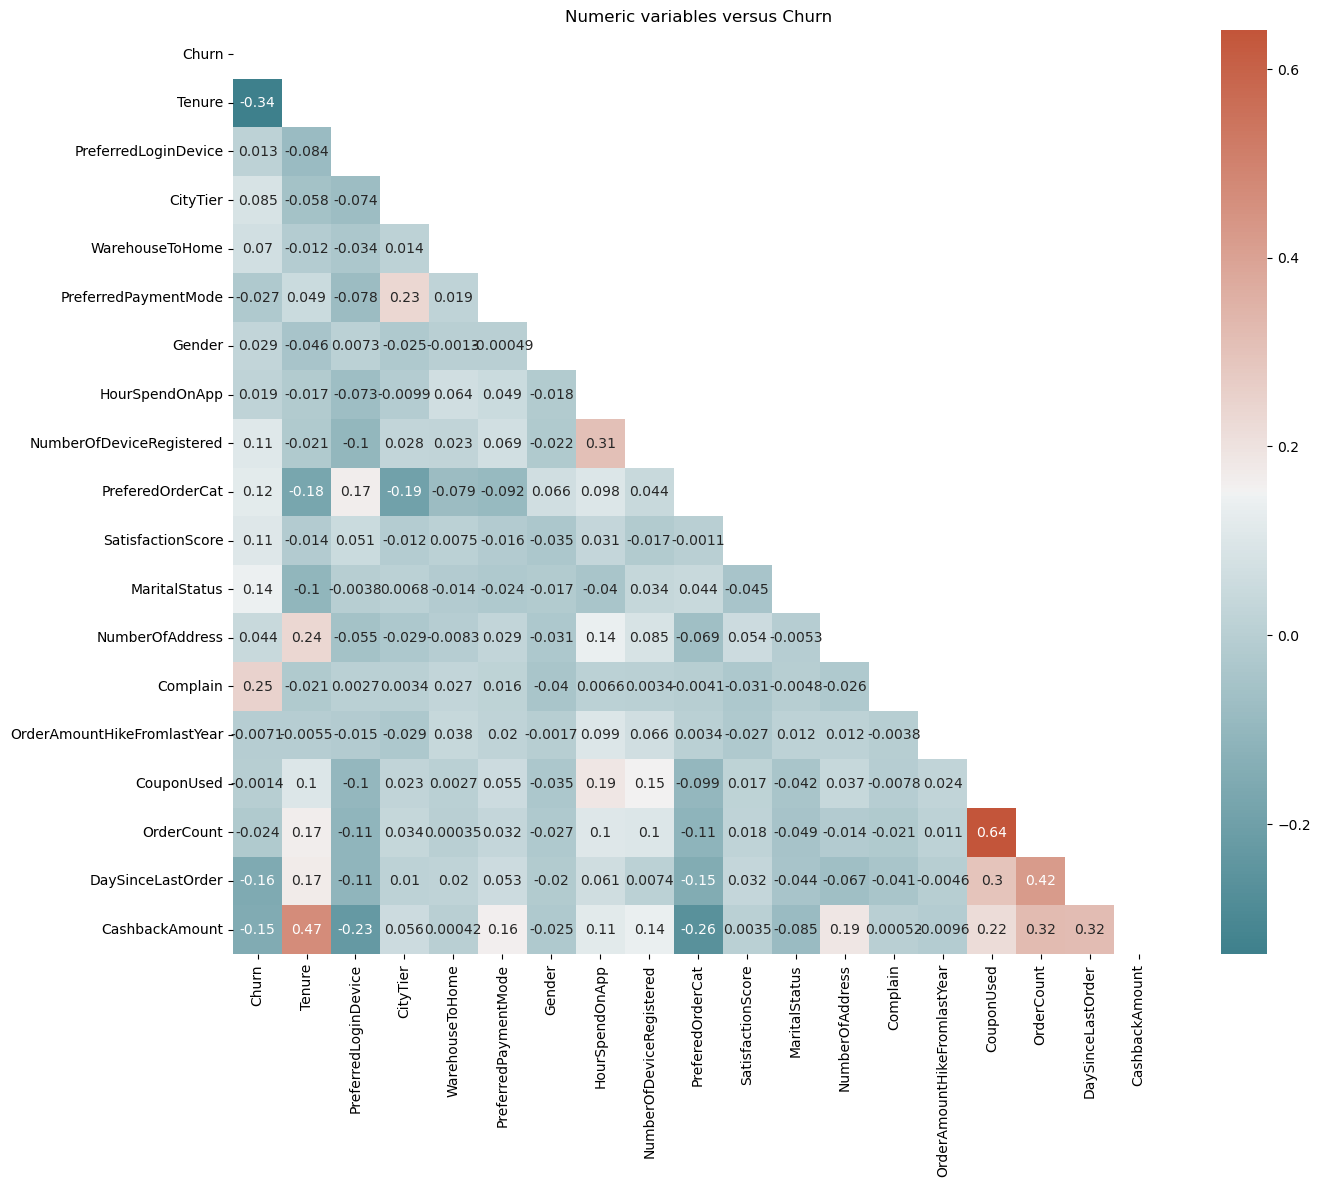

In [69]:
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(210, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title('Numeric variables versus Churn')

 - Tenure, Day Since Last Order, Cashback Amount has higher correlation with Churn

#### In boxplot of below, you can double check the variables with major impact on churn

#### main_features we assumed = 
- Numerical : 'Tenure', 'CashbackAmount', 'DaySinceLastOrder', 'WarehouseToHome', 
- Categorical : 'Complain', 'MaritalStatus', 'PreferedOrderCat'


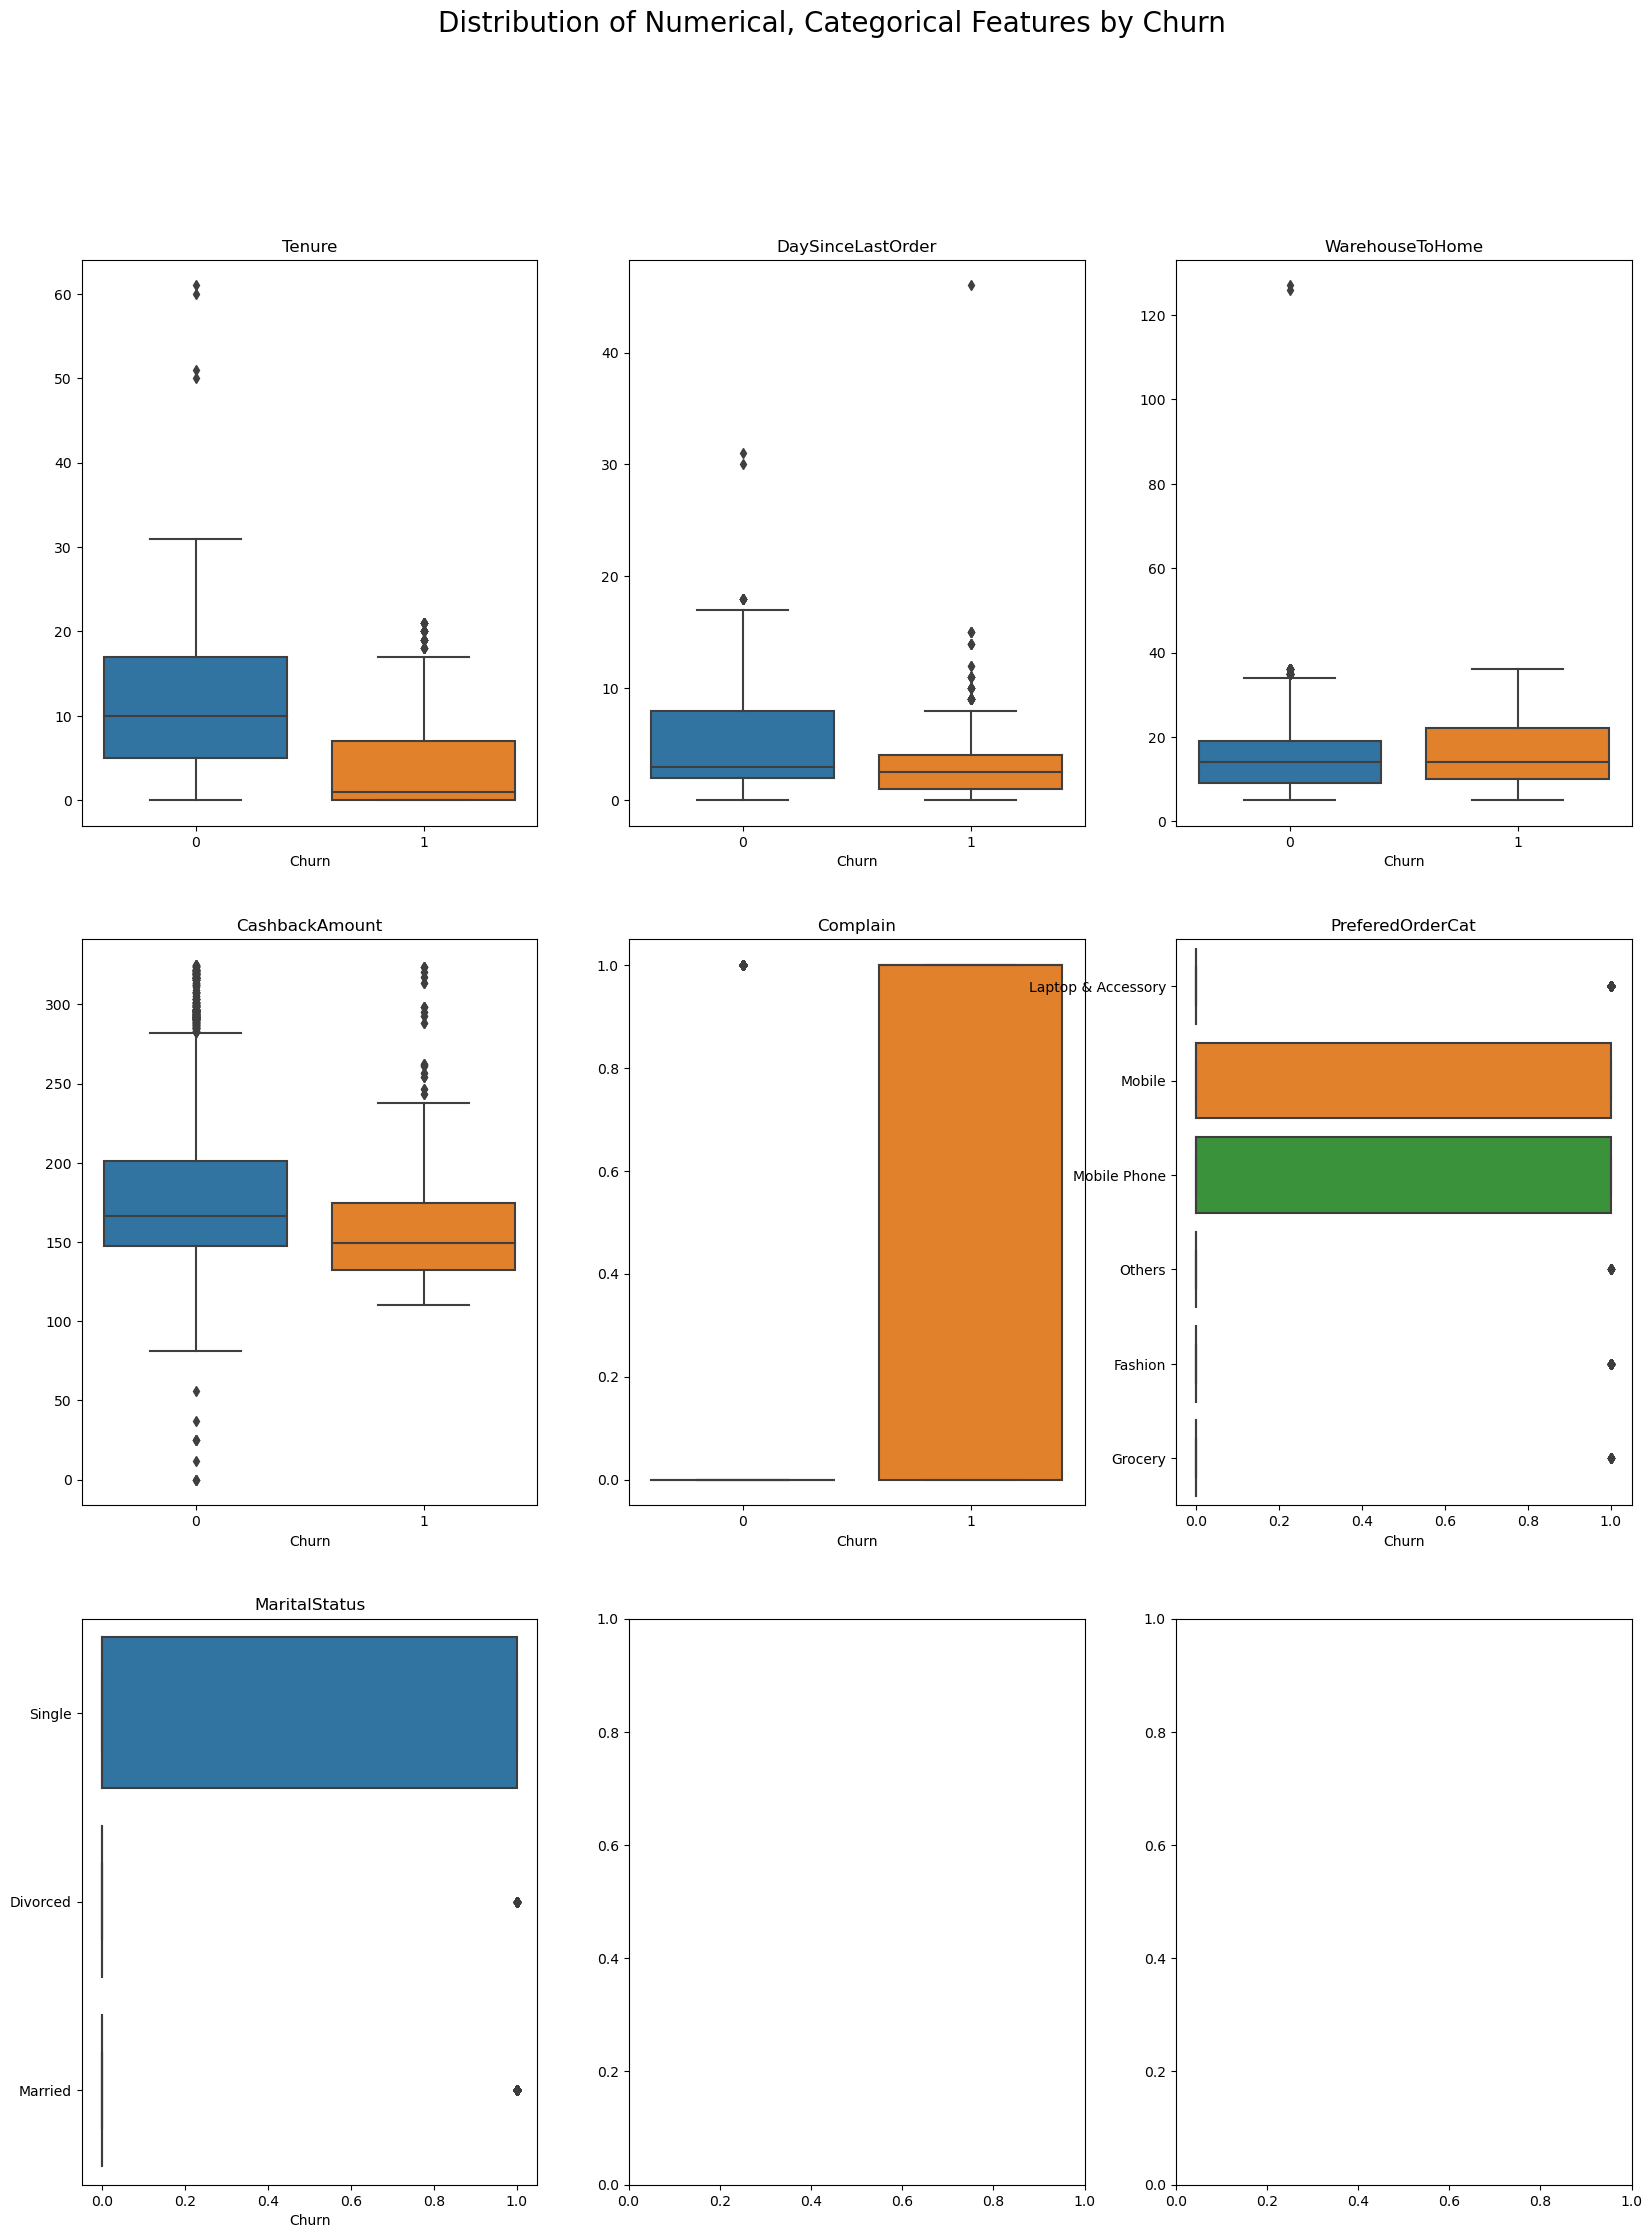

In [17]:
# sort out main features
main_features = ['Tenure','DaySinceLastOrder', 'WarehouseToHome',  'CashbackAmount', 'Complain', 'PreferedOrderCat', 'MaritalStatus']

# create boxplot to see if these main features have impact on churn
fig, ax = plt.subplots(3,3,figsize=(20, 25))
fig.suptitle('Distribution of Numerical, Categorical Features by Churn', fontsize=20)
ax = ax.flatten()
for idx,c in enumerate(df[main_features]):
    dff = df[df[c].notnull()].copy()
    ax[idx].set_title(c) 
    sns.boxplot(x='Churn', y=c, data=df, ax=ax[idx])
    ax[idx].set_ylabel('')
plt.show()

- You can clearly see the differences between the distribution of Churn 0 and 1 in each of above variable,from which we can assume the existence of correlations</font>

#### Now, we would like to analyze each correlation one by one with more details 

#### preparing data to see the details of each variable versus churn 

In [18]:
# defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.
# this was done so that we can quickly automate making such dataframes

df['Churn'] = df['Churn'].astype('int')
d={}

# running loop for storing the calculating and storing the values in the relevant dataframes  
for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(), df[i].value_counts(), np.round(df.groupby(i).Churn.sum() * 100 / df[i].value_counts(), 2)], axis=1)
    d[i].reset_index(level=0, inplace=True)
    d[i] = d[i].rename(columns={'index': i, 'Churn': 'Customers_churned', i: 'Total_Customers', 0: '%_of_churn'})
                    

In [19]:
## brush data for plotting

#tenure
tenure_churn = d['Tenure']
tenure_churn_20 =tenure_churn[:21]

#day since last order
daysincelast = d['DaySinceLastOrder'][:17]
daysincelast

#warehouse to home
WarehouseToHome = d['WarehouseToHome']

#hours spend on app
hoursSpendOnApp = d['HourSpendOnApp']
hoursSpendOnApp


,HourSpendOnApp,Customers_churned,Total_Customers,%_of_churn
0,0.0,0,3,0.00
1,1.0,0,35,0.00
2,2.0,232,1471,15.77
3,3.0,518,2942,17.61
4,4.0,198,1176,16.84
5,5.0,0,3,0.00


####  Looking into our major variables - 4 numerical & 3 categorical variables

#### * Numerical

### Customers Churned by Tenure

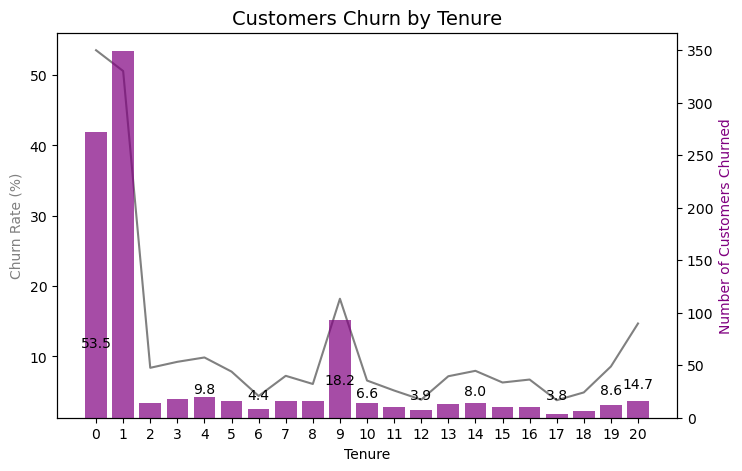

In [73]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the first line plot on the primary y-axis
ax1.plot(tenure_churn_20.index, tenure_churn_20['%_of_churn'], color='grey')
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Churn Rate (%)', color='grey')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the bar plot on the secondary y-axis
ax2.bar(tenure_churn_20.index, tenure_churn_20['Customers_churned'], width=0.8, color='purple', alpha=0.7)
ax2.set_ylabel('Number of Customers Churned', color='purple')

# Turn off the grid for both axes
ax1.grid(False)
ax2.grid(False)

# set xticks range
xticks_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
xticks_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']  # You can use any labels you want

# # Set the x-axis tick positions and labels
plt.xticks(xticks_positions, xticks_labels)
# Set the title
plt.title('Customers Churn by Tenure', size = 14)

for x, y in zip(tenure_churn_20['Tenure'], tenure_churn_20['%_of_churn']):
    if x in [0, 4, 6, 9, 10, 12, 14, 17, 19, 20]:
        plt.annotate(f'{y:.1f}', (x, y), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=10)

# Display the plot
plt.show()

- Prolonging customer's tenure at least 2 years is the important key for keeping retention rate stably
- Average Churn rate of Tenure from 0-1 is around 50% 
- From the Tenure 2years, it suddenly drops to under 10%
- Until Tenure 20 years, it has some ups and downs, and after then, tenure converges to 0

## Day Since Last Order

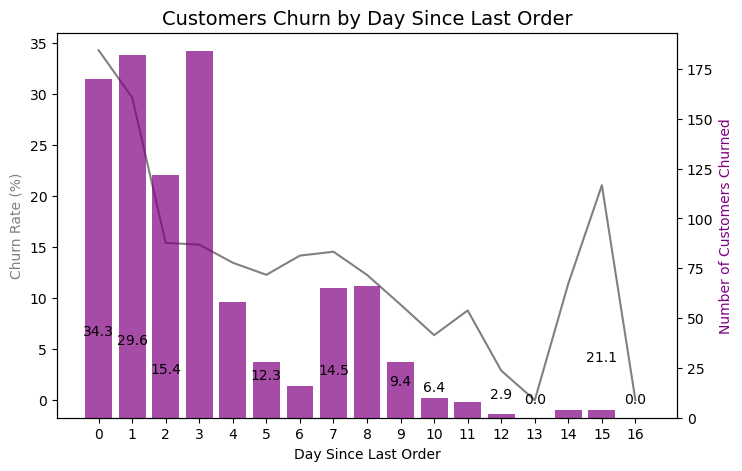

In [74]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the first line plot on the primary y-axis
ax1.plot(daysincelast.index, daysincelast['%_of_churn'], color='grey')
ax1.set_xlabel('Day Since Last Order')
ax1.set_ylabel('Churn Rate (%)', color='grey')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the bar plot on the secondary y-axis
ax2.bar(daysincelast.index, daysincelast['Customers_churned'], width=0.8, color='purple', alpha=0.7)
ax2.set_ylabel('Number of Customers Churned', color='purple')

# Turn off the grid for both axes
ax1.grid(False)
ax2.grid(False)

# set xticks range
xticks_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
xticks_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']  # You can use any labels you want


for x, y in zip(daysincelast['DaySinceLastOrder'], daysincelast['%_of_churn']):
    if x in [0, 1, 2, 5, 7, 9, 10, 12, 13, 15, 16]:
        plt.annotate(f'{y:.1f}', (x, y), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=10)

# # Set the x-axis tick positions and labels
plt.xticks(xticks_positions, xticks_labels)
# Set the title
plt.title('Customers Churn by Day Since Last Order', size = 14)

# Display the plot
plt.show()

- The graph shows that about 30% of possiblity, customers would churn out shortly after their purchase.
- Perhaps they might have had troubles in order journey meeting some unsatisfactory service..

## Warehouse To Home

In [22]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

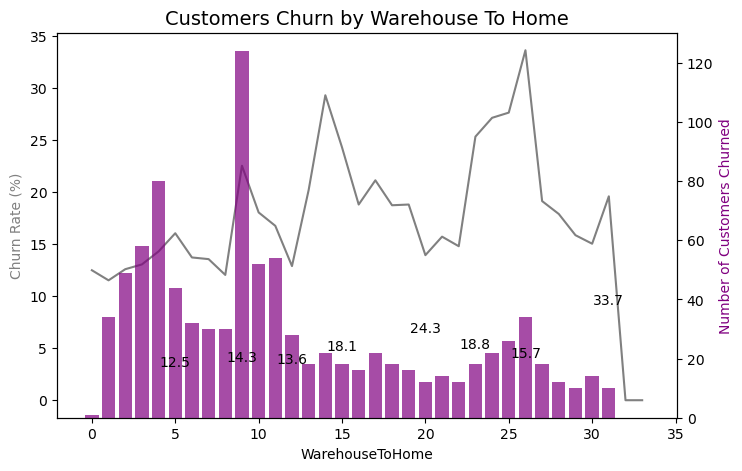

In [75]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the first line plot on the primary y-axis
ax1.plot(WarehouseToHome.index, WarehouseToHome['%_of_churn'], color='grey')
ax1.set_xlabel('WarehouseToHome')
ax1.set_ylabel('Churn Rate (%)', color='grey')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the bar plot on the secondary y-axis
ax2.bar(WarehouseToHome.index, WarehouseToHome['Customers_churned'], width=0.8, color='purple', alpha=0.7)
ax2.set_ylabel('Number of Customers Churned', color='purple')

# Turn off the grid for both axes
ax1.grid(False)
ax2.grid(False)

for x, y in zip(WarehouseToHome['WarehouseToHome'], WarehouseToHome['%_of_churn']):
    if x in [0, 5, 9, 12, 15, 20, 23, 26, 31]:
        plt.annotate(f'{y:.1f}', (x, y), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=10)

# Set the title
plt.title('Customers Churn by Warehouse To Home', size = 14)

# Display the plot
plt.show()

- It shows some positive relation, indicating the larger distance between warehouse and home 

(maybe related to delivery costs) is disadvantageous to customer experiences

## *Categorical

## Complain

In [24]:
complain = d['Complain']

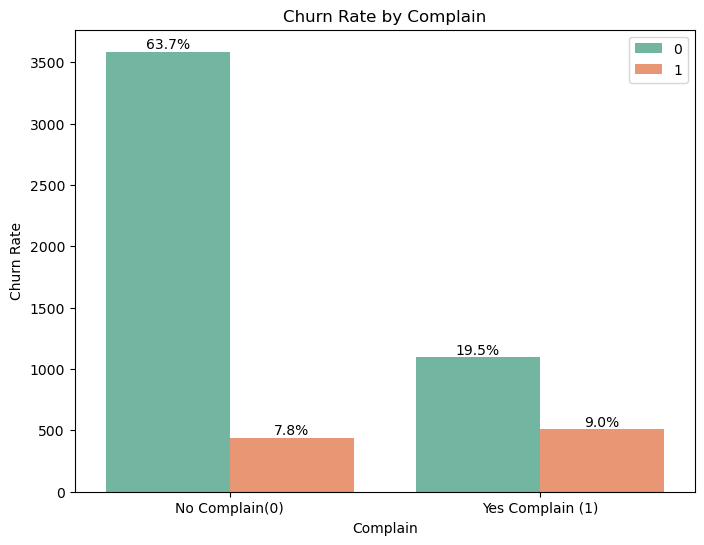

In [25]:
order = df['Complain'].value_counts().index
only_churn = df[['Complain', 'Churn']][df[['Complain', 'Churn']]['Churn'] == 1]

fig, ax = plt.subplots(figsize=(8, 6))

df_sorted = df.sort_values('Complain')
# sns.countplot(x='Complain', hue ='Churn', palette='Set2',data=only_churn, order=order, ax=ax)
graph = sns.countplot(x='Complain', hue ='Churn', palette='Set2',data= df_sorted, order=order, ax=ax)

plt.xlabel('Complain')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Complain')

plt.legend()

custom_labels = ['No Complain(0)', 'Yes Complain (1)'] 
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

total_count = len(df['Complain'])
for p in plt.gca().patches:
    height = p.get_height()
    percentage = height / total_count * 100
    plt.gca().annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

- There's no big differnece in churn rate, whether the customers reported a complain or not. The company should look after not only the explained complains but also the latent ones

## Marital Status

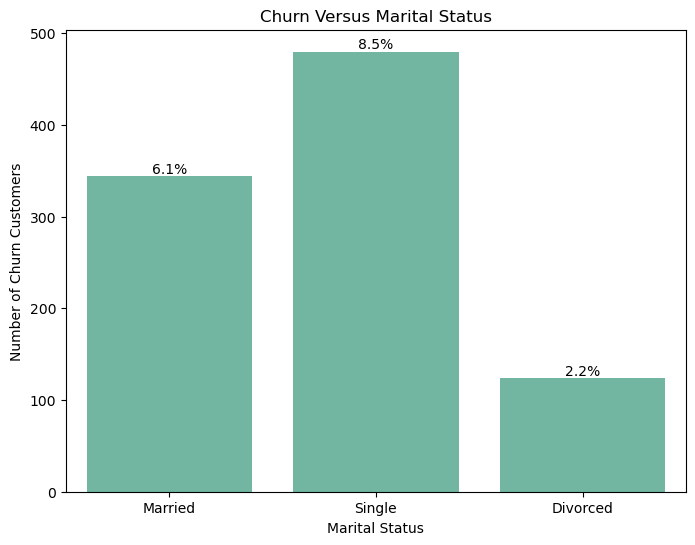

In [26]:
order = df['MaritalStatus'].value_counts().index
only_churn2 = df[['MaritalStatus', 'Churn']][df[['MaritalStatus', 'Churn']]['Churn'] == 1]

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='MaritalStatus', hue ='Churn', palette='Set2',data=only_churn2.sort_values('MaritalStatus'), order=order, ax=ax)


plt.xlabel('Marital Status')
plt.ylabel('Number of Churn Customers')
plt.title('Churn Versus Marital Status')

# Remove the legend
ax.legend().set_visible(False)

total_count = len(df['MaritalStatus'])
for p in plt.gca().patches:
    height = p.get_height()
    percentage = height / total_count * 100
    plt.gca().annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

- Single people have higher churn rate than other Marital Status

## Preferred Ordered Categories

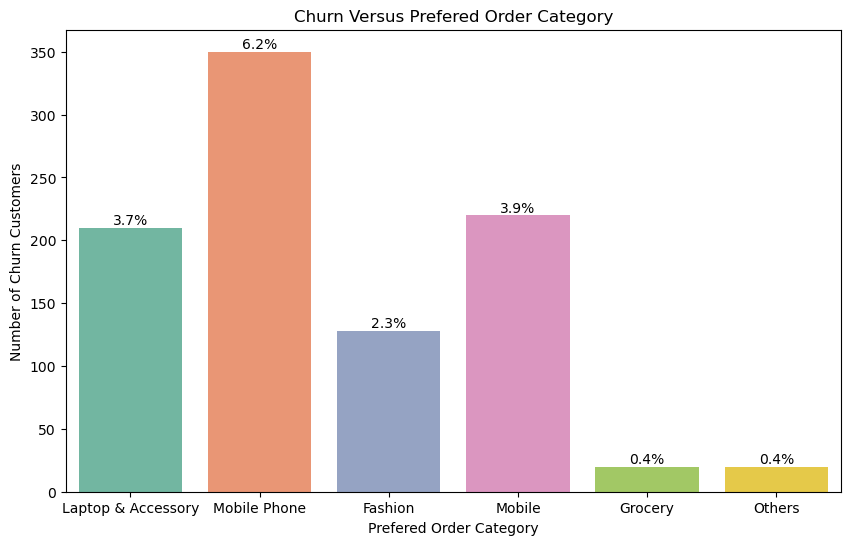

In [27]:
order = df['PreferedOrderCat'].value_counts().index
only_churn_3 = df[['PreferedOrderCat', 'Churn']][df[['PreferedOrderCat', 'Churn']]['Churn'] == 1]

fig, ax = plt.subplots(figsize=(10, 6))


sns.countplot(x = 'PreferedOrderCat', palette='Set2', data = only_churn_3, order=order, ax=ax)
# sns.countplot(x='PreferedOrderCat', hue ='Churn', palette='Set2',data=df, order=order, ax=ax)


plt.xlabel('Prefered Order Category')
plt.ylabel('Number of Churn Customers')
plt.title('Churn Versus Prefered Order Category')


total_count = len(df['PreferedOrderCat'])
for p in plt.gca().patches:
    height = p.get_height()
    percentage = height / total_count * 100
    plt.gca().annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')



- Customers who usually purchase mobile related products or electronics are highly like to churn out than other category purchasers

# Fitting Models

In [28]:
# Data Related
import numpy as np
import pandas as pd
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn import metrics
 
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

In [29]:
#Encoding

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["PreferredLoginDevice"] = ord_enc.fit_transform(df[["PreferredLoginDevice"]])
df["PreferredPaymentMode"] = ord_enc.fit_transform(df[["PreferredPaymentMode"]])
df["Gender"] = ord_enc.fit_transform(df[["Gender"]])
df["PreferedOrderCat"] = ord_enc.fit_transform(df[["PreferedOrderCat"]])
df["MaritalStatus"] = ord_enc.fit_transform(df[["MaritalStatus"]])

In [30]:
df = df.reset_index(drop = True)

In [31]:
#** Data for model fitting**#
#Create X and Y Df
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [32]:
X.shape, y.shape

((5630, 18), (5630,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

In [34]:
X_train.shape, y_train.shape

((4504, 18), (4504,))

## Logistic Regression

In [35]:
import pandas as pd
import statsmodels.api as sm



# Add an intercept term to the features (required for logistic regression)
X_train = sm.add_constant(X_train)

#est = sm.OLS(y, X.astype(float)).fit()
# Fit the logistic regression model

logit_model = sm.Logit(y_train.astype(float), X_train.astype(float))
result = logit_model.fit()

# Get the summary of the model
summary = result.summary()

# Extract the p-values from the summary table
p_values = result.pvalues

# Print the p-values for each feature
print(p_values)


Optimization terminated successfully.
         Current function value: 0.299857
         Iterations 8
const                          6.628925e-16
Tenure                         1.475296e-76
PreferredLoginDevice           4.458781e-03
CityTier                       4.356184e-09
WarehouseToHome                1.680657e-06
PreferredPaymentMode           8.419807e-02
Gender                         2.306225e-03
HourSpendOnApp                 2.316463e-02
NumberOfDeviceRegistered       5.186066e-09
PreferedOrderCat               3.828735e-04
SatisfactionScore              1.415369e-18
MaritalStatus                  4.659730e-12
NumberOfAddress                1.418696e-22
Complain                       1.005455e-58
OrderAmountHikeFromlastYear    1.178944e-02
CouponUsed                     2.320389e-01
OrderCount                     3.626960e-06
DaySinceLastOrder              4.798280e-13
CashbackAmount                 2.366359e-02
dtype: float64


As the p-values for CouponUsed and PreferredPaymentMode is not significant, i.e, not less that 0.05, we will drop the columns from the data to train the model

In [36]:
X.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [37]:
x = X[['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]

In [38]:
'''from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_.fit(X_train, np.ravel(y_train,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)'''

"from sklearn.feature_selection import SelectFromModel\n\nsel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))\nsel_.fit(X_train, np.ravel(y_train,order='C'))\nsel_.get_support()\nX_train = pd.DataFrame(X_train)"

In [39]:
'''selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))'''

"selected_feat = X_train.columns[(sel_.get_support())]\nprint('total features: {}'.format((X_train.shape[1])))\nprint('selected features: {}'.format(len(selected_feat)))\nprint('features with coefficients shrank to zero: {}'.format(\nnp.sum(sel_.estimator_.coef_ == 0)))"

Fitting logistic regression model using final features

In [40]:
#Preparing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 99)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8712255772646537

Performing CV to check for devaition in the error rate of model

In [41]:
# Create a logistic regression model
logreg = LogisticRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=3)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.873502   0.87541639 0.87408394]
Mean CV score: 0.874334110149381
Standard deviation of CV scores: 0.0008013161021965907


In [42]:
y_pred = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels=[0,1])


print("Confusion Matrix:")
print(cm)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       941
           1       0.67      0.43      0.52       185

    accuracy                           0.87      1126
   macro avg       0.78      0.69      0.72      1126
weighted avg       0.86      0.87      0.86      1126

Confusion Matrix:
[[902  39]
 [106  79]]
In-Sample Accuracy: 0.88
Out-of-Sample Accuracy: 0.87


CONFUSION MATRIX


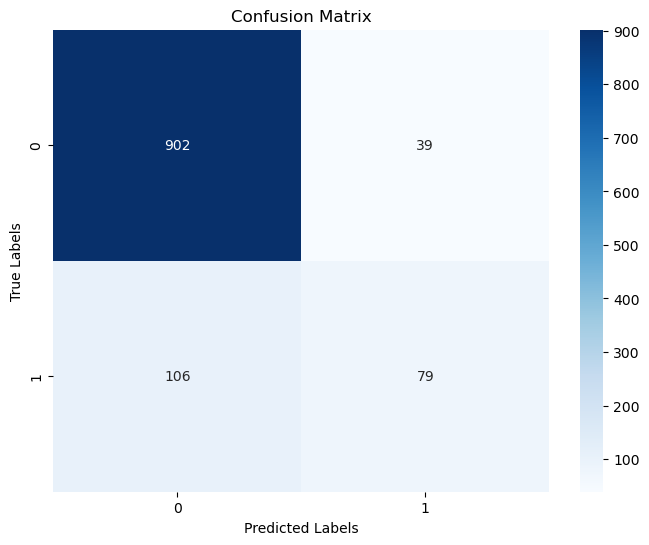

In [44]:
#Plot Confusion Matrix
print("CONFUSION MATRIX")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Model has low recall , but we a model which has high recall, inorder to ensure lower Churned customer are being predicted as not churned

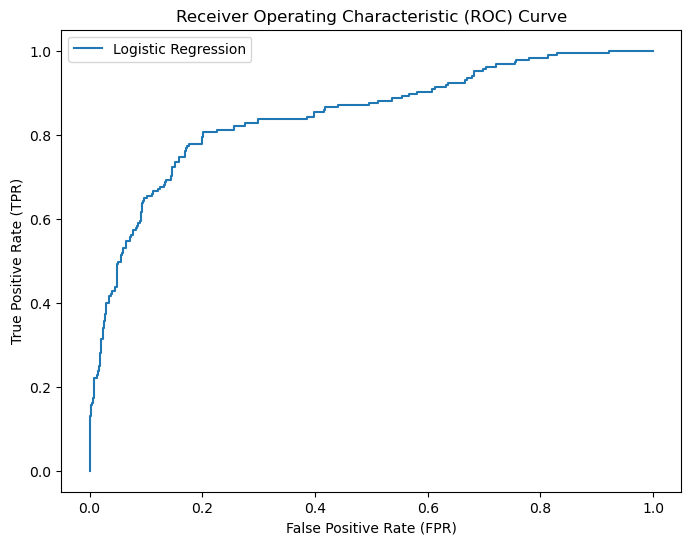

AUC Score: 0.846


Optimal Threshold: 0.19239499213814232


In [45]:
# Predict probabilities on the test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Find the optimal threshold that maximizes the Youden's J statistic (tpr - fpr)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auclr = round(roc_auc_score(y_test,  y_probs), 4)

print("AUC Score:",auclr)
print("\n")


print("Optimal Threshold:", optimal_threshold)

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities on the test set

y_probs_pred = logreg.predict_proba(X_train)[:, 1]  # Probabilities of the positive class
y_probs = logreg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Adjust the classification threshold to 0.217
threshold = 0.217
y_train_pred = (y_probs_pred >= threshold).astype(int)
y_pred = (y_probs >= threshold).astype(int)

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Out sample Accuracy:", accuracy)


# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In-Sample Accuracy: 0.81
Out sample Accuracy: 0.8285968028419183
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       941
           1       0.49      0.78      0.60       185

    accuracy                           0.83      1126
   macro avg       0.72      0.81      0.74      1126
weighted avg       0.87      0.83      0.84      1126

Confusion Matrix:
[[789 152]
 [ 41 144]]


CONFUSION MATRIX


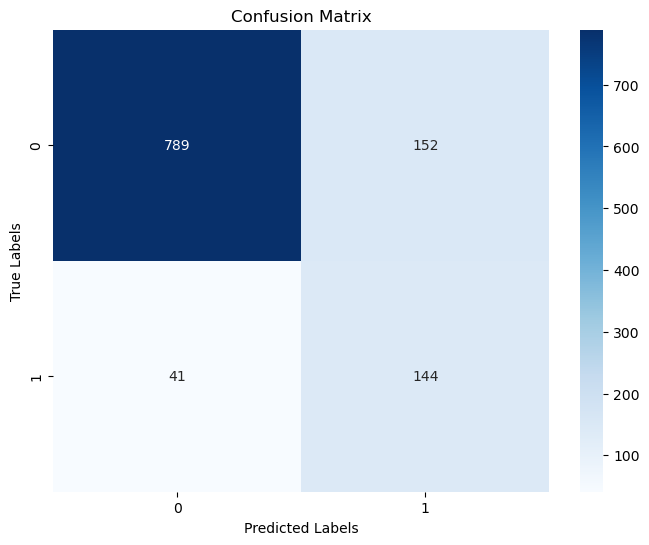

In [47]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Decision Tree

In [48]:
from IPython.display import display
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix , roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In-Sample Accuracy: 1.00
Out-of-Sample Accuracy: 0.96


CONFUSION MATRIX:


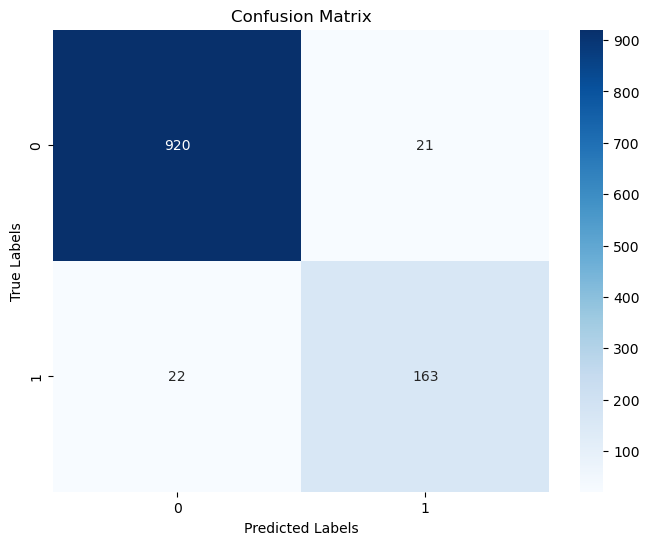

FEATURE IMPORTANCE:


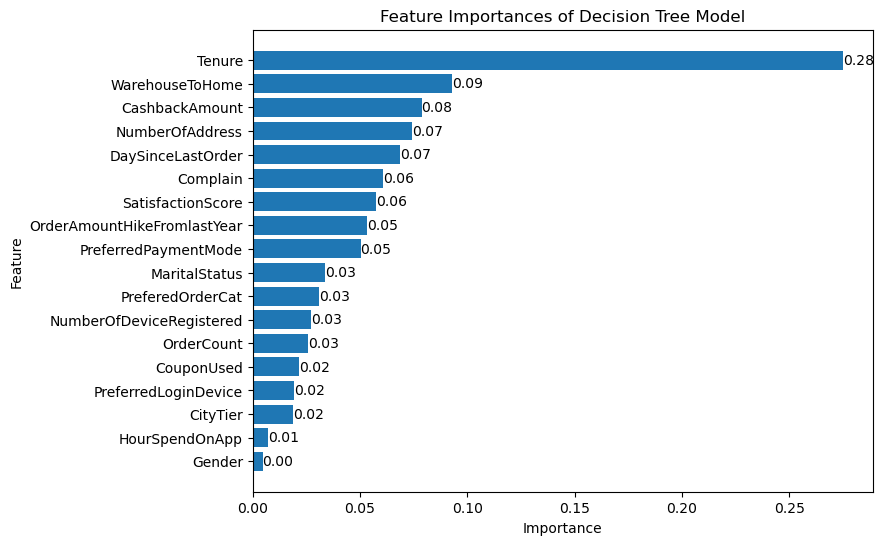

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       941
           1       0.89      0.88      0.88       185

    accuracy                           0.96      1126
   macro avg       0.93      0.93      0.93      1126
weighted avg       0.96      0.96      0.96      1126

AUC Score: 0.9294


ROC CURVE:


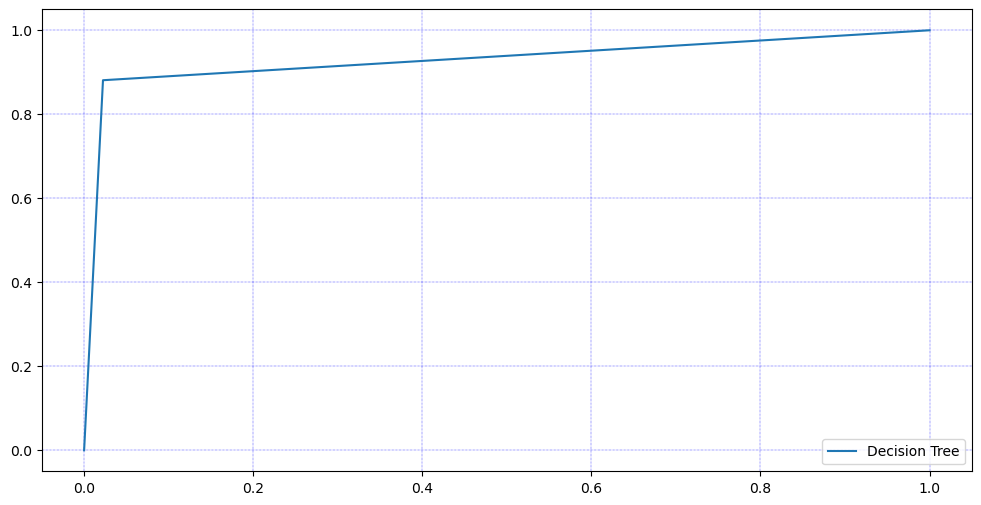

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix , roc_curve
from sklearn.metrics import RocCurveDisplay

# ** Baseline Decision Tree **

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Making prediction
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

#Evaluate Performance -Mean accuracy of Rf in gven data
# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = clf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Decision Tree Model')
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=clf.predict_proba(X_test)[::,1]

fpr1, tpr1, _a = roc_curve(y_test,  y1_pred_prob)
auc = round(roc_auc_score(y_test,  y1_pred_prob), 4)

print("AUC Score:",auc)
print("\n")

#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr1,tpr1,label="Decision Tree")


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

In [50]:
#** Random search - Decision Tree **#

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2, 5, 7,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print(best_params)
# Create a new classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params)

# Fitting decision tree
best_clf.fit(X_train, y_train)

#Making prediction
y_test_pred_b = best_clf.predict(X_test)
y_train_pred_b = best_clf.predict(X_train)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In-Sample Accuracy: 0.97
Out-of-Sample Accuracy: 0.94


CONFUSION MATRIX:


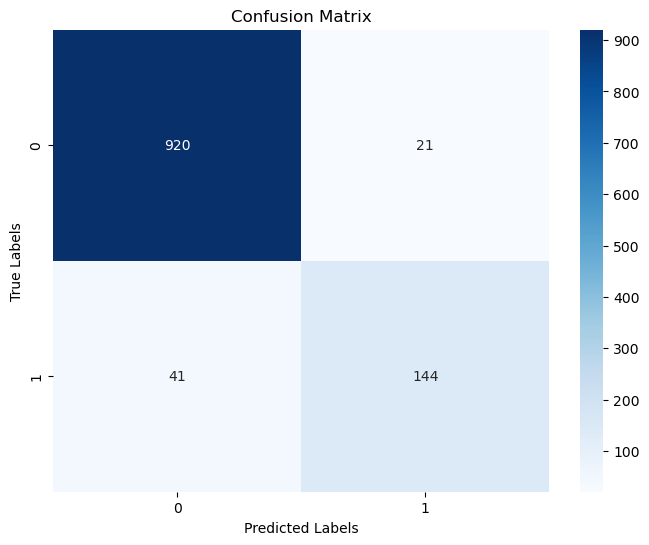

FEATURE IMPORTANCE:


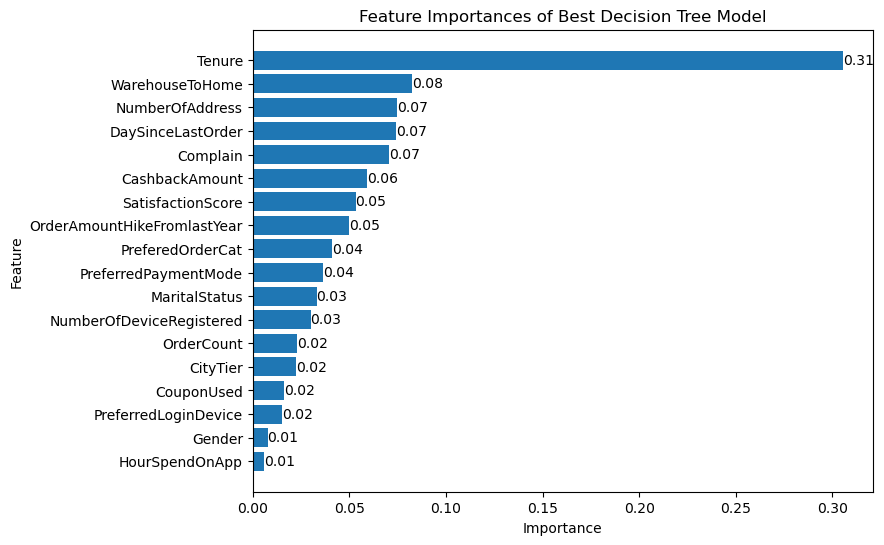

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       941
           1       0.87      0.78      0.82       185

    accuracy                           0.94      1126
   macro avg       0.92      0.88      0.90      1126
weighted avg       0.94      0.94      0.94      1126

AUC Score: 0.9294


ROC CURVE:


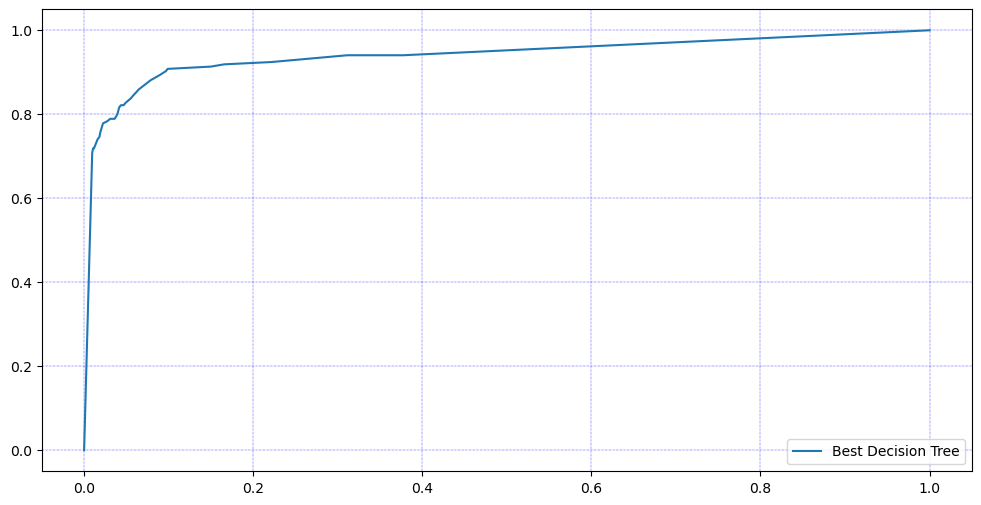

In [51]:
#For the best param model found using randomsearch
#Evaluate Performance -Mean accuracy of Clf in given data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred_b)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test,y_test_pred_b)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred_b,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = best_clf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Best Decision Tree Model')
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred_b))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob_b=best_clf.predict_proba(X_test)[::,1]

fpr1_b, tpr1_b, _a = roc_curve(y_test,  y1_pred_prob_b)
aucdt = round(roc_auc_score(y_test,  y1_pred_prob_b), 4)

print("AUC Score:",auc)
print("\n")

   
#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr1_b,tpr1_b,label="Best Decision Tree")


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()



# Random Forest

In-Sample Accuracy: 1.00
Out-of-Sample Accuracy: 0.98


CONFUSION MATRIX:


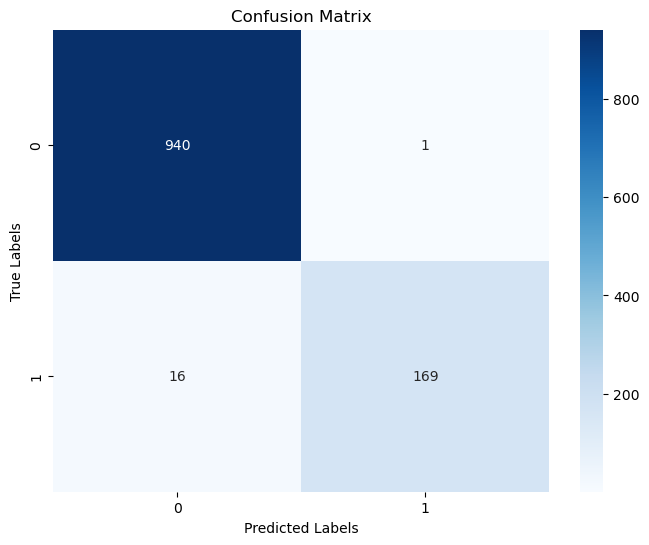

FEATURE IMPORTANCE:


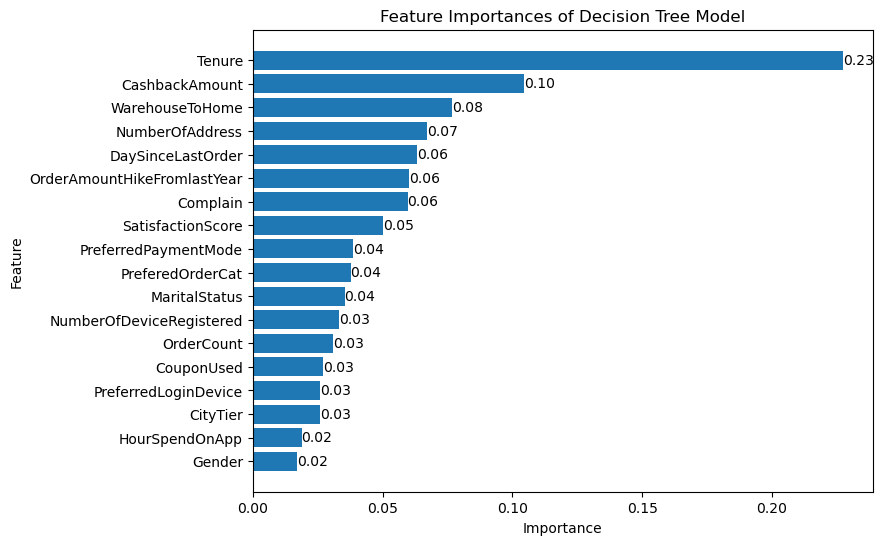

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.99      0.91      0.95       185

    accuracy                           0.98      1126
   macro avg       0.99      0.96      0.97      1126
weighted avg       0.99      0.98      0.98      1126

AUC Score: 0.9294


ROC CURVE:


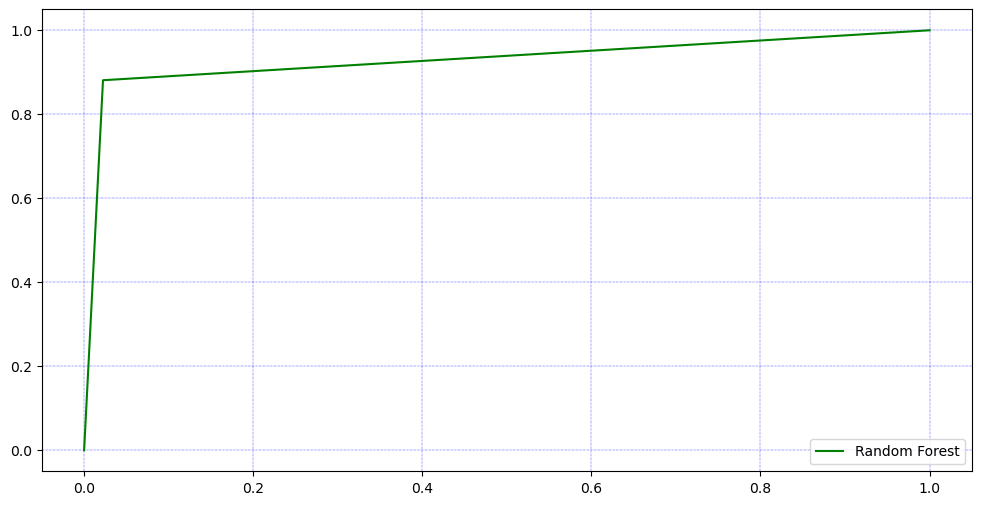

In [52]:
# ** Baseline RF **#

# Create a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#Making prediction
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

#Evaluate Performance -Mean accuracy of Rf in gven data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Decision Tree Model')
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=clf.predict_proba(X_test)[::,1]

fpr2, tpr2, _a = roc_curve(y_test,  y1_pred_prob)
auc = round(roc_auc_score(y_test,  y1_pred_prob), 4)

print("AUC Score:",auc)
print("\n")
   
#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr2,tpr2,label="Random Forest",color='green')


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

In [53]:
# **Random Search - Defining the best fit for the model using Random_grid and RandomizedSearchCV**

# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 3,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)

# Best parameter values from random search

print('Best Parameters for Random Forest :',rf_random.best_params_)

# Create a new classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Fitting decision tree
best_rf.fit(X_train, y_train)

#Making prediction
y_test_pred_b = best_rf.predict(X_test)
y_train_pred_b = best_rf.predict(X_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warn

[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1135; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1135; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1135; total time=   2.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=200, max_features=auto, min_sa

/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=3000; total time=   6.3s
[CV] END bootstrap=True, criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1135; total time=   2.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=200, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=2585; total time=   8.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=75, max_features=auto, min_samples_leaf=2, min_samples_split=30, n_estimators=1964; total time=   4.8s
[CV] END bootstrap=False, criterion=gini, max_depth=200, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=1757; total time=   5.3s
[CV] END bootstrap=True, criterion=gini, max_depth=150, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=2171; total time=   5.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=200, max

/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=3000; total time=   6.3s
[CV] END bootstrap=True, criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1135; total time=   2.8s
[CV] END bootstrap=False, criterion=entropy, max_depth=200, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=2585; total time=   8.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=75, max_features=auto, min_samples_leaf=2, min_samples_split=30, n_estimators=1964; total time=   4.8s
[CV] END bootstrap=False, criterion=gini, max_depth=200, max_features=auto, min_samples_leaf=3, min_samples_split=15, n_estimators=1757; total time=   5.2s
[CV] END bootstrap=True, criterion=gini, max_depth=150, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=2171; total time=   5.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=200, max

/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END bootstrap=False, criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1757; total time=   5.3s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=721; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2585; total time=   3.2s
[CV] END bootstrap=True, criterion=gini, max_depth=1, max_feat

/Users/hayoung/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters for Random Forest : {'n_estimators': 514, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 200, 'criterion': 'gini', 'bootstrap': False}


In-Sample Accuracy: 0.93
Out-of-Sample Accuracy: 0.91


CONFUSION MATRIX:


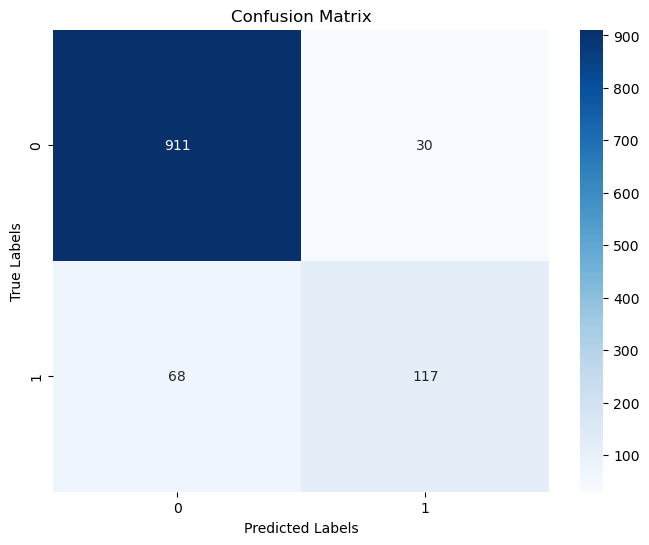

FEATURE IMPORTANCE:


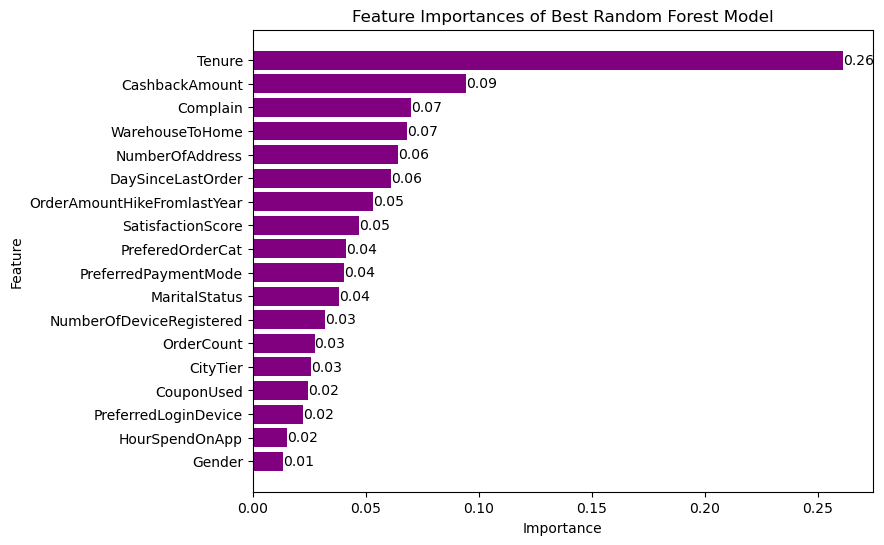

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       941
           1       0.80      0.63      0.70       185

    accuracy                           0.91      1126
   macro avg       0.86      0.80      0.83      1126
weighted avg       0.91      0.91      0.91      1126

AUC Score: 0.9445


ROC CURVE:


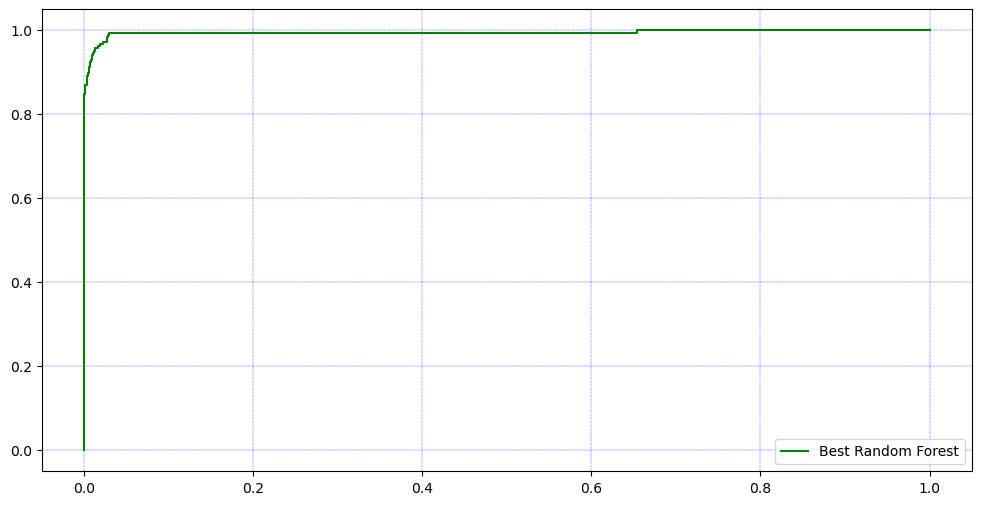

In [76]:
#For the best param model found using randomsearch
#Evaluate Performance -Mean accuracy of Rf in given data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred_b)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test,y_test_pred_b)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred_b,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = best_rf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'], color = 'purple')

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Best Random Forest Model')
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred_b))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob_b=best_rf.predict_proba(X_test)[::,1]

fpr2_b, tpr2_b, _a = roc_curve(y_test,  y1_pred_prob_b)
aucrf = round(roc_auc_score(y_test,  y1_pred_prob_b), 4)

print("AUC Score:",auc)
print("\n")

#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr2_b,tpr2_b,label="Best Random Forest",color="green")


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()



# KNN Neighbours

In [55]:
pip install numpy==1.21.4

  Using cached numpy-1.21.4-cp39-cp39-macosx_10_9_x86_64.whl (17.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
elasticnet 1.0.2 requires numpy>=1.25.0, but you have numpy 1.21.4 which is incompatible.
elasticnet 1.0.2 requires pandas>=1.5.3, but you have pandas 1.4.4 which is incompatible.
elasticnet 1.0.2 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 1.21.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

In [57]:
from sklearn.preprocessing import StandardScaler
#Scaling the variable:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In-Sample Accuracy: 0.96
Out-of-Sample Accuracy: 0.93


CONFUSION MATRIX:


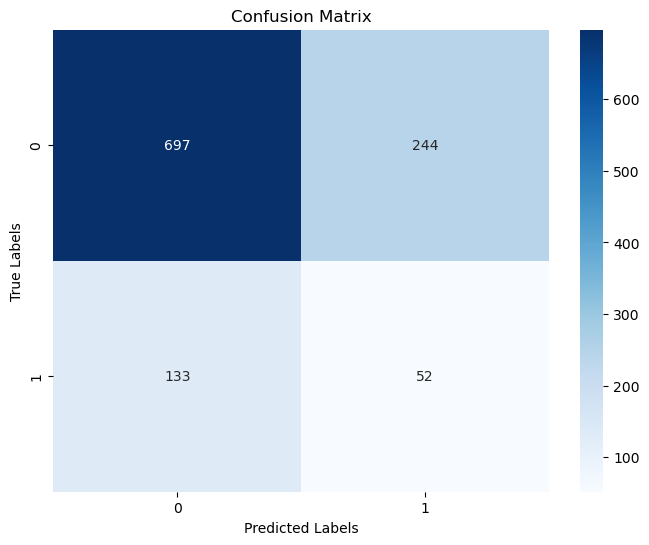

FEATURE IMPORTANCE:


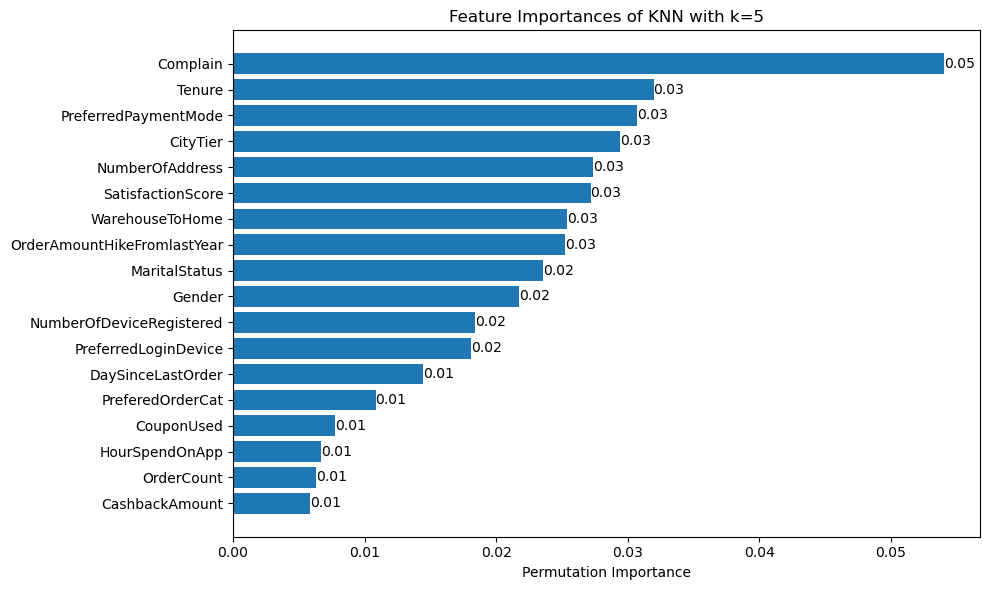

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       941
           1       0.90      0.68      0.77       185

    accuracy                           0.93      1126
   macro avg       0.92      0.83      0.87      1126
weighted avg       0.93      0.93      0.93      1126

AUC Score: 0.8304


ROC CURVE:


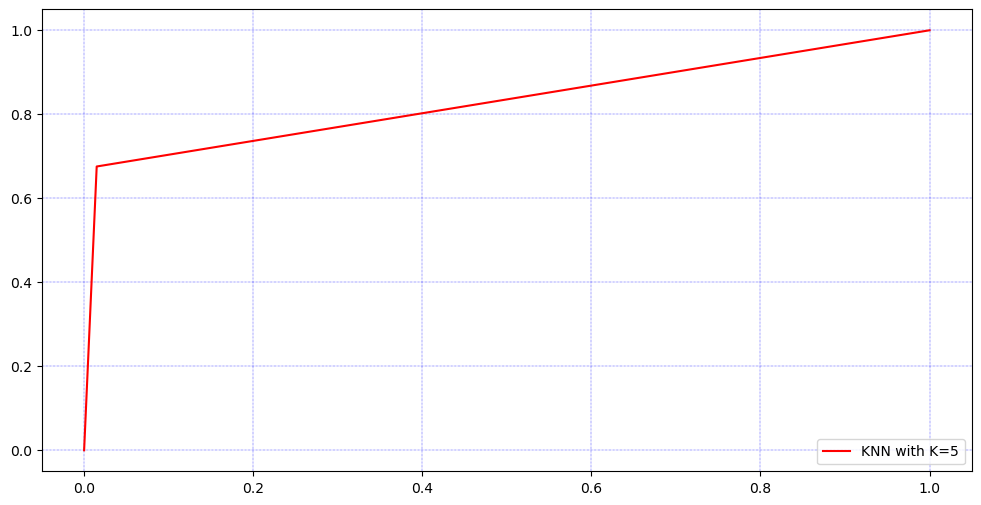

In [58]:
from sklearn.neighbors import KNeighborsClassifier
#** KNN model **#
k= 5  # Set the value of K (number of neighbors)
knn_model = KNeighborsClassifier(n_neighbors=k)

#Fitting the model
knn_model.fit(X_train_scaled, y_train)

#Making prediction
y_test_pred= knn_model.predict(X_test_scaled)
y_train_pred= knn_model.predict(X_train_scaled)

#Evaluate Performance -Mean accuracy of Rf in gven data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

from sklearn.inspection import permutation_importance

# Get feature importance using permutation importance
result = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to store the feature importances and their names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})

# Sort the features based on importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
plt.xlabel('Permutation Importance')
plt.title('Feature Importances of KNN with k=5')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.tight_layout()
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=knn_model.predict_proba(X_test_scaled)[::,1]

fpr3, tpr3, _a = roc_curve(y_test,  y_test_pred)
auc = round(roc_auc_score(y_test,  y_test_pred), 4)

print("AUC Score:",auc)
print("\n")
   
#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr3,tpr3,label="KNN with K=5",color='red')


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()


In [59]:
error_rate=[]#list that will store the average error rate value of k
minimum_error_rate=1
k=1
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_pred_i=clf.predict(X_test)
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test,y_pred_i)
    # Calculate the error rate (misclassification rate)
    errorrate = 1 - accuracy
    error_rate.append(errorrate)
    if errorrate < minimum_error_rate:
        minimum_error_rate=errorrate
        k=i
    else:
        continue

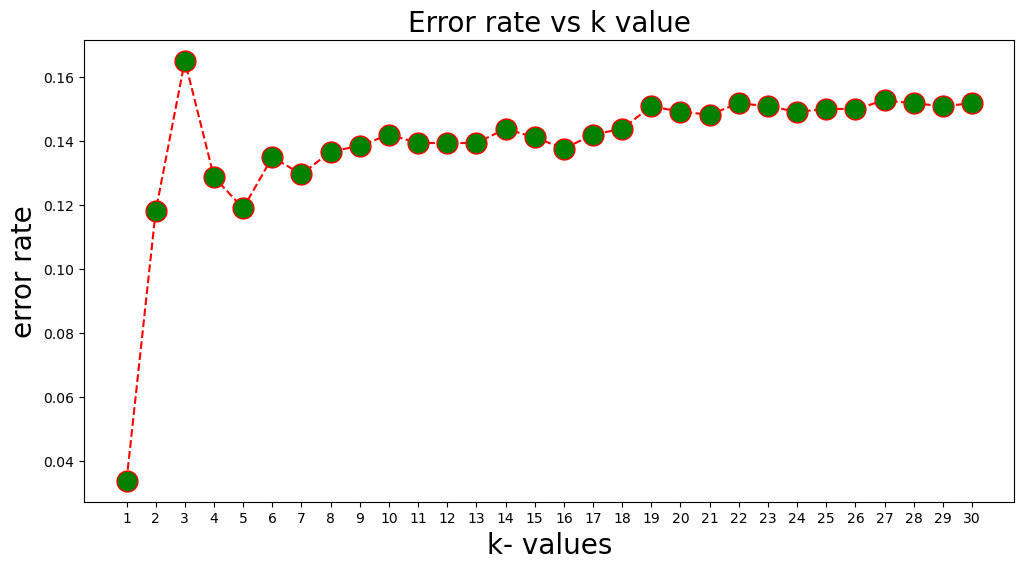

In [60]:
#plotting the error rate vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
     linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

In [61]:
##We see that k=1 gives us the lowest rate but to avoid overfitting we will go ahead with k=4 as the next best estimate

In-Sample Accuracy: 0.96
Out-of-Sample Accuracy: 0.93


CONFUSION MATRIX:


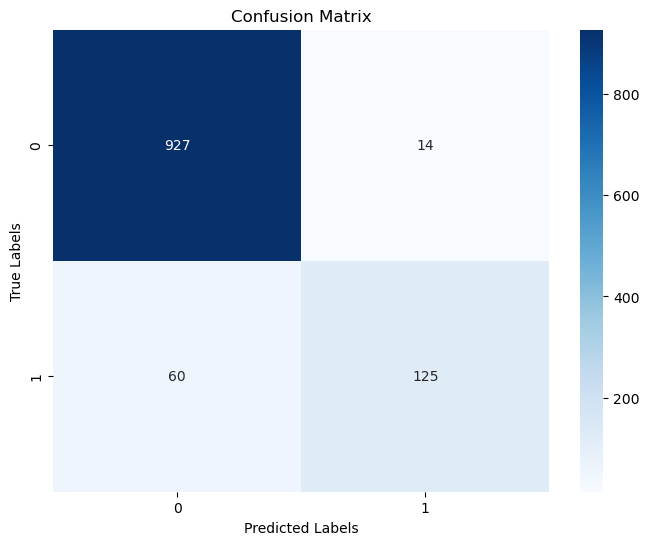

FEATURE IMPORTANCE:


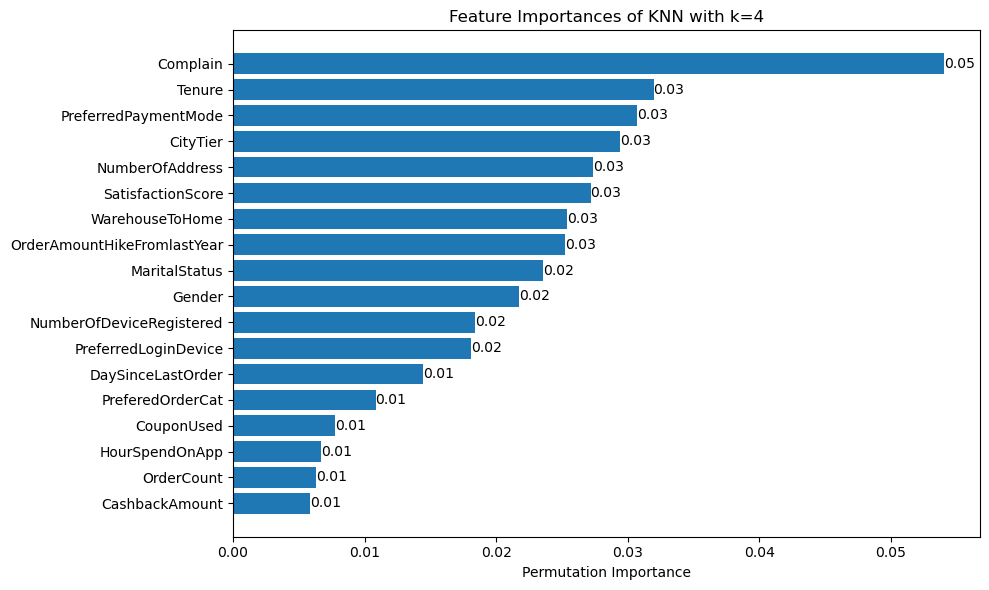

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       941
           1       0.90      0.68      0.77       185

    accuracy                           0.93      1126
   macro avg       0.92      0.83      0.87      1126
weighted avg       0.93      0.93      0.93      1126

AUC Score: 0.8304


ROC CURVE:


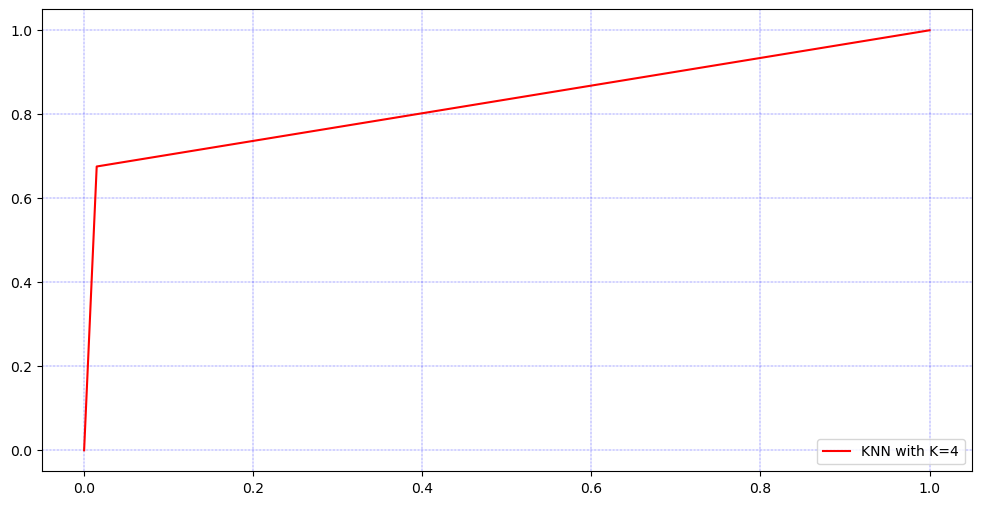

In [62]:
from sklearn.neighbors import KNeighborsClassifier
#** KNN model **#
k= 4  # Set the value of K (number of neighbors)
knn_model_b = KNeighborsClassifier(n_neighbors=k)

#Fitting the model
knn_model_b.fit(X_train_scaled, y_train)

#Making prediction
y_test_pred_b= knn_model.predict(X_test_scaled)
y_train_pred_b= knn_model.predict(X_train_scaled)

#Evaluate Performance -Mean accuracy of Rf in gven data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred_b)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred_b)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred_b,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

from sklearn.inspection import permutation_importance

# Get feature importance using permutation importance
result = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to store the feature importances and their names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})

# Sort the features based on importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
plt.xlabel('Permutation Importance')
plt.title('Feature Importances of KNN with k=4')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.tight_layout()
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred_b))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob_b=knn_model_b.predict_proba(X_test_scaled)[::,1]

fpr3_b, tpr3_b, _a = roc_curve(y_test,  y_test_pred_b)
auck = round(roc_auc_score(y_test,  y_test_pred_b), 4)

print("AUC Score:",auc)
print("\n")
   
#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr3_b,tpr3_b,label="KNN with K=4",color='red')


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()


# Gradient Boosting

In-Sample Accuracy: 0.83
Out-of-Sample Accuracy: 0.84


CONFUSION MATRIX


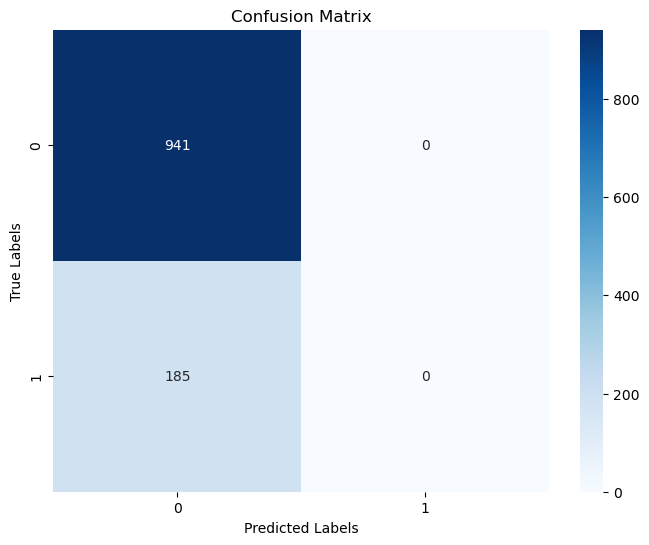

FEATURE IMPORTANCE


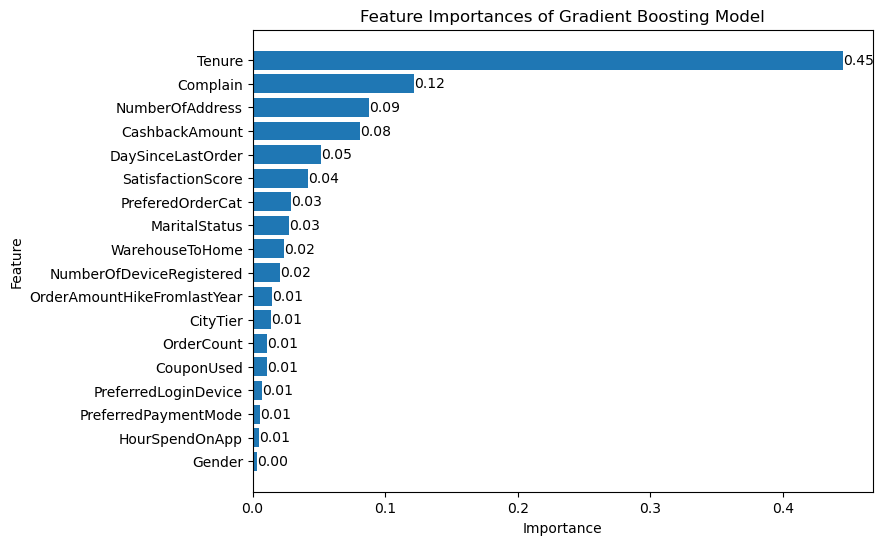

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       941
           1       0.00      0.00      0.00       185

    accuracy                           0.84      1126
   macro avg       0.42      0.50      0.46      1126
weighted avg       0.70      0.84      0.76      1126

AUC Score: 0.9445


ROC CURVE:


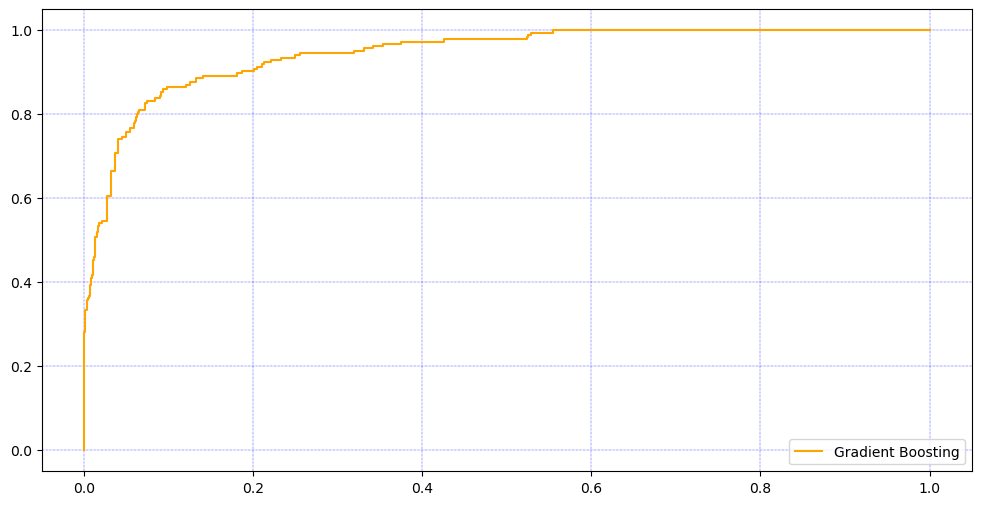

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
# ** Baseline GB **

# Create a random forest classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

#Making prediction
y_test_pred= gb.predict(X_test_scaled)
y_train_pred= gb.predict(X_train_scaled)

#Evaluate Performance -Mean accuracy of Gradient Boosting in gven data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = gb.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Gradient Boosting Model')
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=gb.predict_proba(X_test)[::,1]

fpr4, tpr4, _a = roc_curve(y_test,  y1_pred_prob)
auc = round(roc_auc_score(y_test,  y1_pred_prob), 4)

print("AUC Score:",auc)
print("\n")
   
#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr4,tpr4,label="Gradient Boosting",color='orange')


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()


In [64]:
# **Randomized CV Search - Using baseline as the best parameter from Randomised search CV**
param_grid = {
    'n_estimators': np.linspace(2585, 3000, 5, dtype = int),
    'max_depth': [10,20,50],
    'learning_rate' : [0.01]
}
# Base modelfor Randomised search
best_gb = GradientBoostingClassifier()

# Instantiate the Randomised search model
random_gb_search = RandomizedSearchCV(estimator =best_gb, param_distributions = param_grid)
random_gb_search.fit(X_train, y_train)

# Best parameter values from random search

best_gb_grid = random_gb_search.best_estimator_
random_gb_search.best_params_

[CV] END bootstrap=True, criterion=gini, max_depth=150, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=30, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=30, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=30, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=721; total time=   1.5s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=721; total time=   1.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, max_features=

{'n_estimators': 2688, 'max_depth': 10, 'learning_rate': 0.01}

In-Sample Accuracy: 0.93
Out-of-Sample Accuracy: 0.91


CONFUSION MATRIX


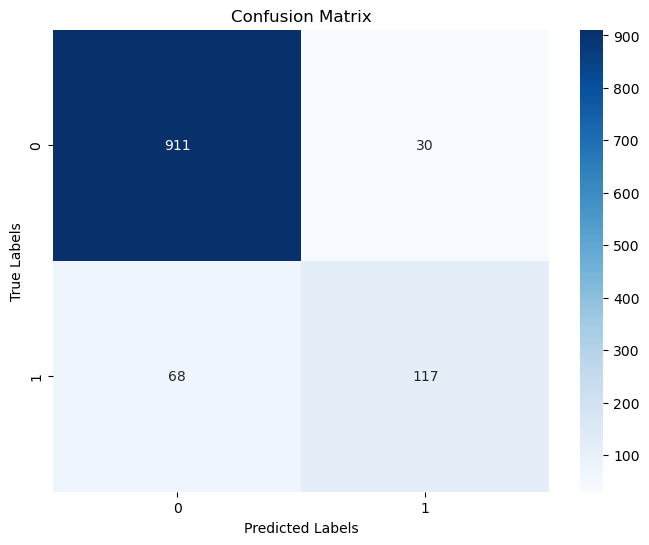

FEATURE IMPORTANCE


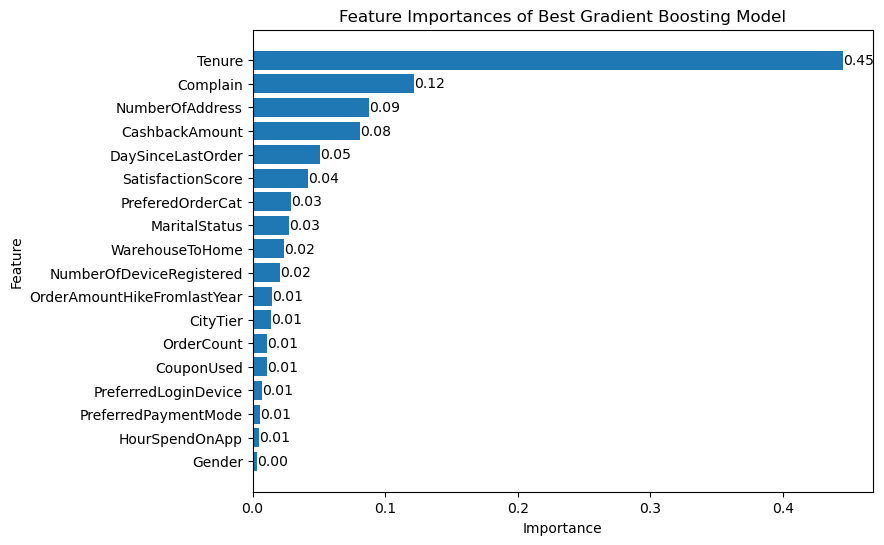

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       941
           1       0.80      0.63      0.70       185

    accuracy                           0.91      1126
   macro avg       0.86      0.80      0.83      1126
weighted avg       0.91      0.91      0.91      1126

AUC Score: 0.9445


ROC CURVE:


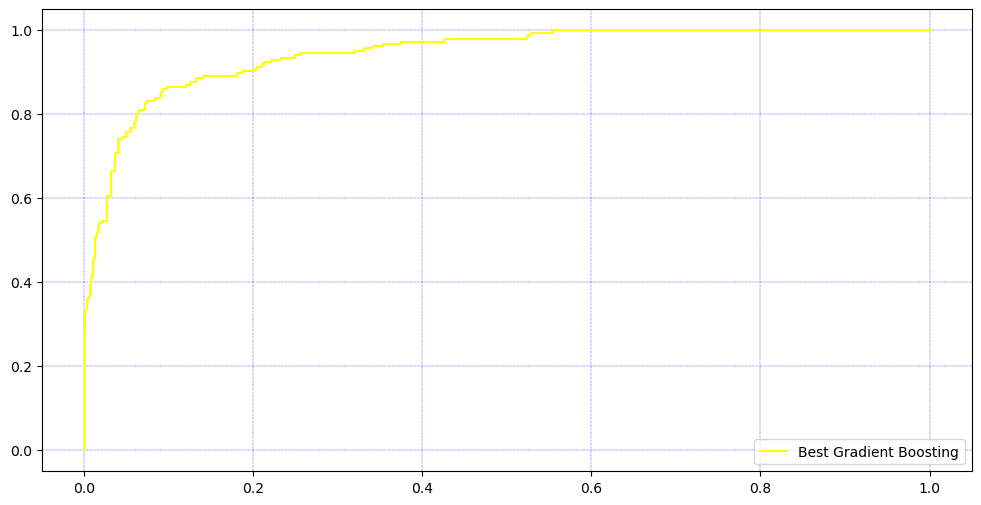

In [65]:
# **Random Search - Defining the best fit for the model using Random_grid and RandomizedSearchCV**

# Create a new classifier with the best hyperparameters
best_gb = GradientBoostingClassifier()

# Fitting decision tree
best_gb.fit(X_train, y_train)

#Making prediction
y_test_pred_b= best_gb.predict(X_test)
y_train_pred_b= best_gb.predict(X_train)

#Evaluate Performance -Mean accuracy of Gradient Boosting in gven data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(y_train, y_train_pred_b)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred_b)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred_b,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = best_gb.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Best Gradient Boosting Model')
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred_b))

#Calculating ROC_AUC Score
# r_probs=[0 for i in range(len(y_test))]
# y1_pred_prob=best_gb.predict_proba(X_test_scaled)[::,1]

fpr4_b, tpr4_b, _a = roc_curve(y_test,  y_test_pred_b)
aucgb = round(roc_auc_score(y_test,  y_test_pred_b), 4)


print("AUC Score:",auc)
print("\n")
   
#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr4,tpr4,label="Best Gradient Boosting",color='yellow')


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()


Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

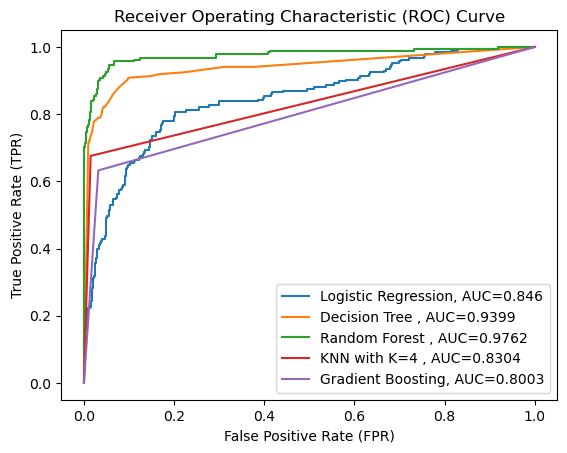

In [66]:
#Plotting ROC graphs for all the models:
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auclr))
plt.plot(fpr1_b,tpr1_b,label="Decision Tree , AUC="+str(aucdt))
plt.plot(fpr2_b,tpr2_b,label="Random Forest , AUC="+str(aucrf))
plt.plot(fpr3_b,tpr3_b,label="KNN with K=4 , AUC="+str(auck))
plt.plot(fpr4_b,tpr4_b,label="Gradient Boosting, AUC="+str(aucgb))

#add legend
plt.legend()

# Plot ROC curve
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
